# ***Libraries***

In [ ]:
!pip install scikit-learn

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
import numpy as np


In [90]:
def mapping_Ycoordinates(y):
    m = -13 / 7534
    b = -m*15400
    return m * y + b
def mapping_Xcoordinates(x):
  m = -17 / 9700
  b = -m*13900
  return m * x + b
def mapping_Zcoordinates(z):
  z = 1.5
  return z

# **Data Preprocessing**

In [91]:
simulation_features = pd.read_excel("combined_features.xlsx")
simulation_labels = pd.read_excel("labels.xlsx")

In [41]:
phoneData = pd.read_csv("phoneData.csv")
phoneData_nullFree = phoneData.dropna()

first_three_columns = phoneData_nullFree.iloc[:, 1:4]
rest_of_columns = phoneData_nullFree.iloc[:, 4:]
# Group by the first three columns and average the rest
phoneData_cleaned = phoneData_nullFree.groupby(list(first_three_columns.columns)).mean().reset_index()

realWorld_features = phoneData_cleaned.iloc[:, 4:]
realWorld_labels = phoneData_cleaned.iloc[:, 0:3]

In [44]:
X_train_real, X_test_real, Y_train_real, Y_test_real = train_test_split(realWorld_features, realWorld_labels, test_size=0.35, random_state=42)

# Define and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_real, Y_train_real)

# Predict and evaluate
y_pred_real = rf_model.predict(X_test_real)
mse_real = mean_squared_error(Y_test_real, y_pred_real)
print(f'Random Forest Test MSE: {mse_real}')

Random Forest Test MSE: 1.6456174603174603


In [45]:
Y_test_real

,x,y,z
0,1.0,1.0,1.5
5,1.0,6.0,1.5
36,4.0,1.0,1.5
45,4.0,10.0,1.5
13,2.0,2.0,1.5
54,5.0,7.0,1.5
33,3.0,10.0,1.5
48,5.0,1.0,1.5
12,2.0,1.0,1.5
57,5.0,10.0,1.5


In [46]:
y_pred_real

array([[ 1.8 ,  4.51,  1.5 ],
       [ 2.14,  5.83,  1.5 ],
       [ 2.01,  2.95,  1.5 ],
       [ 3.93,  9.81,  1.5 ],
       [ 2.13,  2.89,  1.5 ],
       [ 4.71,  9.19,  1.5 ],
       [ 3.09,  9.57,  1.5 ],
       [ 3.63,  6.88,  1.5 ],
       [ 2.38,  3.27,  1.5 ],
       [ 4.94,  9.63,  1.5 ],
       [ 3.36, 10.37,  1.5 ],
       [ 4.57,  4.1 ,  1.5 ],
       [ 2.81,  8.82,  1.5 ],
       [ 1.9 ,  3.83,  1.5 ],
       [ 3.98,  8.91,  1.5 ],
       [ 2.28,  6.91,  1.5 ],
       [ 2.07,  9.32,  1.5 ],
       [ 2.7 ,  8.17,  1.5 ],
       [ 3.22,  6.15,  1.5 ],
       [ 2.5 ,  4.47,  1.5 ],
       [ 3.95,  9.69,  1.5 ]])

In [92]:
# Mapping Coordinates
simulation_labels["x"] = simulation_labels["x"].apply(lambda x: round(mapping_Xcoordinates(x)))
simulation_labels["y"] = simulation_labels["y"].apply(lambda y: round(mapping_Ycoordinates(y)))
simulation_labels["z"] = simulation_labels["z"].apply(mapping_Zcoordinates)

In [93]:
simulation_labels

,x,y,z
0,3,1,1.5
1,15,1,1.5
2,6,12,1.5
3,12,6,1.5
4,1,0,1.5
...,...,...,...
145,14,10,1.5
146,2,13,1.5
147,9,11,1.5
148,0,4,1.5


In [94]:
X_train_sim, X_test_sim, Y_train_sim, Y_test_sim = train_test_split(simulation_features, simulation_labels, test_size=0.35, random_state=42)

# Define and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sim, Y_train_sim)

# Predict and evaluate
Y_pred_sim = rf_model.predict(X_test_sim)
Y_pred_sim = round(Y_pred_sim)
mse_sim = mean_squared_error(Y_test_sim, Y_pred_sim)
print(f'Random Forest Test MSE: {mse_sim}')

Random Forest Test MSE: 0.5023798742138365


In [99]:
Y_test_sim

,x,y,z
73,13,11,1.5
18,5,9,1.5
118,12,9,1.5
78,11,1,1.5
76,2,1,1.5
31,8,4,1.5
64,13,3,1.5
141,8,7,1.5
68,2,5,1.5
82,15,11,1.5


In [105]:
#Y_pred_sim[].round(0).astype(int)
Y_pred_sim[:, [0, 1]] = np.round(Y_pred_sim[:, [0, 1]]).astype(int)

In [106]:
Y_pred_sim

array([[11., 11.,  2.],
       [ 5.,  9.,  2.],
       [12.,  9.,  2.],
       [11.,  2.,  2.],
       [ 3.,  1.,  2.],
       [ 9.,  4.,  2.],
       [13.,  3.,  2.],
       [ 8.,  7.,  2.],
       [ 2.,  6.,  2.],
       [15., 10.,  2.],
       [12.,  2.,  2.],
       [ 5.,  3.,  2.],
       [ 3., 10.,  2.],
       [ 7.,  2.,  2.],
       [ 2., 11.,  2.],
       [13.,  2.,  2.],
       [ 6.,  5.,  2.],
       [ 8., 11.,  2.],
       [10., 12.,  2.],
       [15., 10.,  2.],
       [ 8., 10.,  2.],
       [ 9.,  5.,  2.],
       [ 5., 11.,  2.],
       [ 6.,  7.,  2.],
       [ 2.,  3.,  2.],
       [14., 10.,  2.],
       [12., 11.,  2.],
       [ 7.,  3.,  2.],
       [14., 10.,  2.],
       [ 4., 10.,  2.],
       [14.,  7.,  2.],
       [ 4., 11.,  2.],
       [10.,  2.,  2.],
       [ 4.,  2.,  2.],
       [ 2., 10.,  2.],
       [ 2., 11.,  2.],
       [12.,  6.,  2.],
       [15.,  7.,  2.],
       [ 2.,  2.,  2.],
       [ 4.,  1.,  2.],
       [ 2.,  6.,  2.],
       [13.,  8.

In [95]:
Y_test_sim

,x,y,z
73,13,11,1.5
18,5,9,1.5
118,12,9,1.5
78,11,1,1.5
76,2,1,1.5
31,8,4,1.5
64,13,3,1.5
141,8,7,1.5
68,2,5,1.5
82,15,11,1.5


COMBINED DATASETS

In [116]:
realWorld_features_cleaned

,id,x,y,z,rssi_HUAWEI_CUTE_BD57,rssi_YaSeR_Osama,rssi_MG2024,rssi_Samas_iPhone,mag_x,mag_y,mag_z
0,1,1.0,1.0,1.5,-72.0,-60.0,-60.0,-69.0,11.456250,-6.956250,-49.556250
1,2,1.0,2.0,1.5,-60.0,-61.0,-71.0,-66.0,16.481250,0.768750,-45.337500
2,3,1.0,3.0,1.5,-60.0,-61.0,-71.0,-66.0,17.831251,-1.143750,-42.956253
3,4,1.0,4.0,1.5,-68.0,-57.0,-66.0,-65.0,17.512500,-1.950000,-39.525000
4,5,1.0,5.0,1.5,-68.0,-57.0,-66.0,-65.0,15.712501,3.150000,-38.212500
...,...,...,...,...,...,...,...,...,...,...,...
91,92,5.0,8.0,1.5,-64.0,-53.0,-57.0,-60.0,-1.837500,20.850000,-24.993752
92,93,5.0,9.0,1.5,-59.0,-55.0,-58.0,-60.0,-3.281250,20.906250,-27.150002
93,94,5.0,10.0,1.5,-59.0,-55.0,-58.0,-60.0,-1.931250,19.875000,-27.468752
94,95,5.0,11.0,1.5,-59.0,-55.0,-58.0,-60.0,-1.556250,19.837502,-26.418750


In [134]:
sim_rssi_features = simulation_features.iloc[:, -4:]
real_rssi_features = realWorld_features.iloc[:, :4]

combined_labels = np.concatenate((simulation_labels, realWorld_labels))

In [136]:
combined_features = np.vstack((sim_rssi_features, real_rssi_features))

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the combined data
scaler.fit(combined_features)

# Transform both datasets
sim_rssi_features_normalized = scaler.transform(sim_rssi_features)
real_rssi_features_normalized = scaler.transform(real_rssi_features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [139]:
combined_features_normalized = np.concatenate((sim_rssi_features_normalized, real_rssi_features_normalized))

In [140]:
combined_features_normalized.shape

(210, 4)

In [142]:
X_train_combined, X_test_combined, Y_train_combined, Y_test_combined = train_test_split(combined_features_normalized, combined_labels, test_size=0.35, random_state=42)

# Define and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_combined, Y_train_combined)

# Predict and evaluate
Y_pred_combined = rf_model.predict(X_test_combined)
Y_pred_combined = Y_pred_combined
mse_combined = mean_squared_error(Y_test_combined, Y_pred_combined)
print(f'Random Forest Test MSE: {mse_combined}')

Random Forest Test MSE: 1.8760783190690693


# ***TRASH***

In [ ]:

combined_data = pd.concat([real_data, simulated_data], axis=0)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(combined_data)

# Standardization
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(combined_data)

# Convert back to DataFrame if needed
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=combined_data.columns)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=combined_data.columns)

# Split back to real and simulated data if needed
normalized_real_data = min_max_scaled_df.iloc[:len(real_data)]
normalized_simulated_data = min_max_scaled_df.iloc[len(real_data):]

# Use 'normalized_real_data' and 'normalized_simulated_data' for your deep learning model


In [16]:
print(realWorld_features.isnull().sum())
print(realWorld_labels.isnull().sum())



rssi_HUAWEI_CUTE_BD57    0
rssi_YaSeR_Osama         0
rssi_MG2024              0
rssi_Samas_iPhone        0
mag_x                    0
mag_y                    0
mag_z                    0
dtype: int64
x    0
y    0
z    0
dtype: int64


In [ ]:
realWorld_features_cleaned = phoneData.dropna()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_scaled)
print(features_pca.shape)

(150, 10)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(features_pca, labels, test_size=0.35, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate the best model
y_pred = best_model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)

# Calculate MSE for each coordinate
mse_per_coordinate = {}
for coord in labels.columns:
    mse_per_coordinate[coord] = mean_squared_error(y_test[coord], y_pred[:, labels.columns.get_loc(coord)])

print(f'Overall MSE: {mse}')
print(f'MSE per Coordinate: {mse_per_coordinate}')


Overall MSE: 138216.5302075377
MSE per Coordinate: {'x': 169247.46337153643, 'y': 245402.12725098344, 'z': 9.313225746154785e-08}


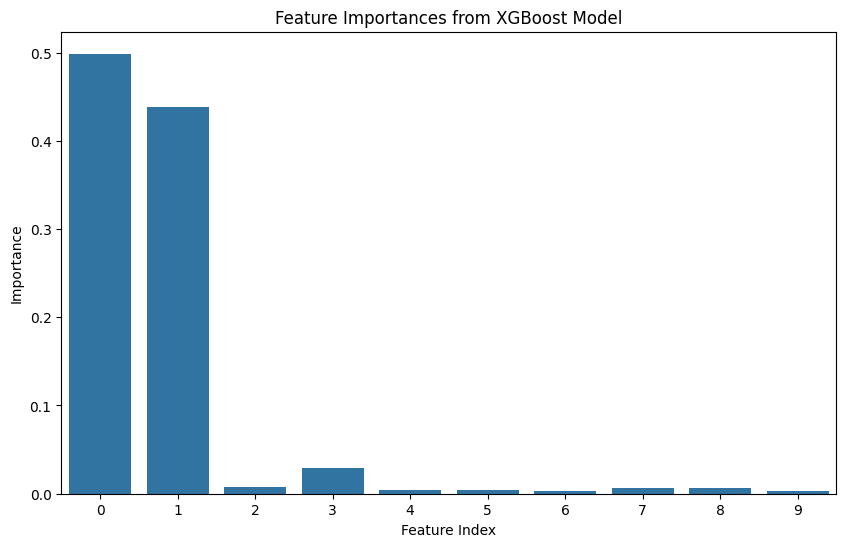

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
feature_importances = best_model.feature_importances_

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=range(len(feature_importances)), y=feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBoost Model')
plt.show()


In [ ]:
mse_per_coordinate = {}
for coord in labels.columns:
    mse_per_coordinate[coord] = mean_squared_error(y_test[coord], y_pred[:, labels.columns.get_loc(coord)])
    print(f'MSE for {coord}: {mse_per_coordinate[coord]}')

MSE for x: 270295.73322375864
MSE for y: 197904.3023627448
MSE for z: 0.0


In [ ]:
import numpy as np
import random

class GridWorld:
    def __init__(self, grid, start, end):
        self.grid = grid
        self.start = start
        self.end = end
        self.reset()

    def reset(self):
        self.position = self.start
        return self.position

    def step(self, action):
        new_position = self.position
        if action == 0:  # Up
            new_position = (self.position[0] - 1, self.position[1])
        elif action == 1:  # Down
            new_position = (self.position[0] + 1, self.position[1])
        elif action == 2:  # Left
            new_position = (self.position[0], self.position[1] - 1)
        elif action == 3:  # Right
            new_position = (self.position[0], self.position[1] + 1)

        if (0 <= new_position[0] < self.grid.shape[0] and
            0 <= new_position[1] < self.grid.shape[1] and
            self.grid[new_position] == 0):
            self.position = new_position

        reward = -1
        if self.position == self.end:
            reward = 100
        return self.position, reward

    def is_terminal(self):
        return self.position == self.end


Policy:
[[1 0 1 1 1]
 [1 0 2 0 1]
 [1 2 2 0 1]
 [1 0 0 0 1]
 [3 3 3 3 0]]
Path taken by the agent:
[(0, 0), (4, 4)]


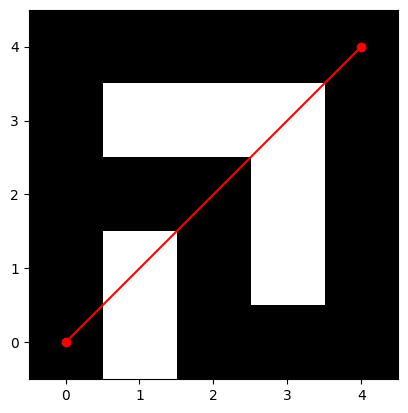

In [ ]:
# Initialize the environment
grid = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])


# Initialize Q-table
state_size = (grid.shape[0], grid.shape[1])
action_size = 4  # Number of possible actions (Up, Down, Left, Right)
q_table = np.zeros(state_size + (action_size,))

# Define the Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000


start = (0, 0)
end = (4, 4)
env = GridWorld(grid, start, end)

# Training loop
for episode in range(episodes):
    state = env.reset()
    while not env.is_terminal():
        # Choose an action (epsilon-greedy)
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, action_size)  # Explore: random action
        else:
            action = np.argmax(q_table[state[0], state[1], :])  # Exploit: choose action with max Q-value

        # Perform the action and observe the new state and reward
        new_state, reward = env.step(action)

        # Update Q-value
        old_value = q_table[state[0], state[1], action]
        next_max = np.max(q_table[new_state[0], new_state[1], :])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state[0], state[1], action] = new_value

        state = new_state

# Extract policy
policy = np.zeros(grid.shape, dtype=int)
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        policy[i, j] = np.argmax(q_table[i, j, :])

# Display the policy
print("Policy:")
print(policy)

# Plot the path taken by the agent
state = start
path = [state]
while state != end:
    action = policy[state[0], state[1]]
    new_state, _ = env.step(action)
    path.append(new_state)
    state = new_state

print("Path taken by the agent:")
print(path)

import matplotlib.pyplot as plt
plt.imshow(grid, cmap='gray')
path = np.array(path)
plt.plot(path[:, 1], path[:, 0], 'ro-')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)
# Initialize Q-table
state_size = X_train.shape[1]  # Number of features
action_size = 4  # Number of possible actions (Up, Down, Left, Right)
q_table = np.zeros((state_size, action_size))

# Define the Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000

# Training loop
for episode in range(episodes):
    state = X_train[np.random.randint(0, X_train.shape[0])]  # Randomly select a training state
    done = False
    while not done:
        # Choose an action (epsilon-greedy)
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, action_size)  # Explore: random action
        else:
            action = np.argmax(q_table[state])  # Exploit: choose action with max Q-value

        # Perform the action and observe the new state and reward
        new_state, reward = env.step(action)

        # Update Q-value
        q_table[state, action] = (1 - alpha) * q_table[state, action] + \
                                  alpha * (reward + gamma * np.max(q_table[new_state]))

        state = new_state

        if state == env.end:
            done = True

# Extract policy
policy = np.argmax(q_table, axis=1)
print("Extracted Policy:", policy)


IndexError: arrays used as indices must be of integer (or boolean) type

TRASH

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming features_scaled is already scaled and contains the original features
# Let's create polynomial features for the top two features

# Extract the top two features
top_features = features_scaled[:, :2]  # Adjust based on your feature indices

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(top_features)

# Combine the new polynomial features with the original scaled features
combined_features = np.hstack((features_scaled, poly_features))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.35, random_state=42)

# Define the model and hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Calculate MSE for each coordinate
mse_per_coordinate = {}
for coord in labels.columns:
    mse_per_coordinate[coord] = mean_squared_error(y_test[coord], y_pred[:, labels.columns.get_loc(coord)])

print(f'Overall MSE: {mse}')
print(f'MSE per Coordinate: {mse_per_coordinate}')


Overall MSE: 212947.49690150624
MSE per Coordinate: {'x': 307881.61444138334, 'y': 330960.8762631206, 'z': 1.4901161193847656e-08}
